NOTEBOOK 
TRABAJO FINAL DE HERRAMIENTAS PARA LA IA
TEMA: INSPECTIONS RESTAURANTS SAN FRANCISCO CA
INTEGRANTES G6: MASACHE JOSE LUIS
                MACHADO EDWIN
                GUEVARA DANILO

In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import ColumnDataSource



In [2]:
database = 'sfscores.sqlite'

In [3]:
connection = sqlite3.connect(database)
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type = 'table';""", connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,businesses,businesses,2,CREATE TABLE businesses (\n\tbusiness_id INTEG...
1,table,inspections,inspections,4313,"CREATE TABLE ""inspections"" (\n\t`business_id`\..."
2,table,violations,violations,5343,"CREATE TABLE ""violations"" (\n\t`business_id`\t..."


In [4]:
connection = sqlite3.connect(database)
# Obtener el nombre de todas las tablas en la base de datos
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type = 'table';""", connection)
# Iterar sobre cada tabla y mostrar todas las filas
for table_name in tables['name']:
    # Leer todas las filas de la tabla actual
    table_data = pd.read_sql(f"SELECT * FROM {table_name};", connection)
    print(f"Tabla: {table_name}")
    print(table_data)
    print("\n")
    table_data

Tabla: businesses
      business_id                                name  \
0              10                    Tiramisu Kitchen   
1              19               Nrgize Lifestyle Cafe   
2              24  OMNI S.F. Hotel - 2nd Floor Pantry   
3              31      Norman's Ice Cream and Freezes   
4              45                 CHARLIE'S DELI CAFE   
...           ...                                 ...   
7629        89416            Nobhill Pizza & Shawerma   
7630        89449                    Burger King 4525   
7631        89453                   Burger King #4668   
7632        89475                  Lovejoy's Tea Room   
7633        89515                       One Waan Thai   

                            address            city postal_code   latitude  \
0                     033 Belden Pl   San Francisco       94104  37.791116   
1      1200 Van Ness Ave, 3rd Floor   San Francisco       94109  37.786848   
2     500 California St, 2nd  Floor   San Francisco       94104

In [5]:
query = "SELECT * FROM inspections "
df = pd.read_sql_query(query, connection)
df

,business_id,Score,date,type
0,10,NaN,20160707,Complaint Reinspection/Followup
1,10,82.0,20160503,Routine - Unscheduled
2,10,NaN,20140807,Reinspection/Followup
3,10,94.0,20140729,Routine - Unscheduled
4,10,NaN,20140124,Reinspection/Followup
...,...,...,...,...
27338,89204,100.0,20160912,Routine - Unscheduled
27339,89296,NaN,20160930,New Ownership
27340,89305,92.0,20160930,Routine - Unscheduled
27341,89305,NaN,20160930,New Ownership


In [6]:
query2 = "SELECT * FROM violations "
df2 = pd.read_sql_query(query2, connection)
df2

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
1,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils
2,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
3,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
4,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
...,...,...,...,...,...
40730,89072,20160922,103131,Moderate Risk,Moderate risk vermin infestation
40731,89072,20160922,103149,Low Risk,Wiping cloths not clean or properly stored or ...
40732,89305,20160930,103154,Low Risk,Unclean or degraded floors walls or ceilings
40733,89305,20160930,103120,Moderate Risk,Moderate risk food holding temperature


In [7]:
#limpieza de datos vacìos
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print("\nDataFrame después de reemplazar valores vacíos por NaN:")
#borrar valores nulos 
df2=df2.dropna() #limpiando filas que tengan valores nulos
df2=df2.drop(['date'], axis=1)#borrar columna date



DataFrame después de reemplazar valores vacíos por NaN:


In [8]:
df2=df2.drop_duplicates() #limpiando filas que tengan valores duplicados
df2

,business_id,ViolationTypeID,risk_category,description
0,10,103129,Moderate Risk,Insufficient hot water or running water
1,10,103144,Low Risk,Unapproved or unmaintained equipment or utensils
2,10,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
3,10,103145,Low Risk,Improper storage of equipment utensils or linens
4,10,103154,Low Risk,Unclean or degraded floors walls or ceilings
...,...,...,...,...
40730,89072,103131,Moderate Risk,Moderate risk vermin infestation
40731,89072,103149,Low Risk,Wiping cloths not clean or properly stored or ...
40732,89305,103154,Low Risk,Unclean or degraded floors walls or ceilings
40733,89305,103120,Moderate Risk,Moderate risk food holding temperature


In [8]:
#leyendo archivo csv
df3=pd.read_csv("Restaurant_Scores_-_LIVES_Standard.csv")
#Convert to DateTime
date_format = "%m/%d/%Y %I:%M:%S %p"
df3["inspection_date"] = pd.to_datetime(df3["inspection_date"], format=date_format)

#Drop unnecessary columns
df3 = df3.drop(["Analysis Neighborhoods","Current Supervisor Districts","Current Police Districts","SF Find Neighborhoods","Neighborhoods","business_phone_number"],axis=1)
df3

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),835_20180917,2018-09-17,88.0,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),905_20190415,2019-04-15,87.0,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1203_20170803,2017-08-03,77.0,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),1345_20170928,2017-09-28,81.0,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1352_20180620,2018-06-20,74.0,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,121 Spear St,San Francisco,CA,94105,NaN,NaN,NaN,96202_20190408,2019-04-08,85.0,Routine - Unscheduled,96202_20190408_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,94103,37.767664,-122.415456,POINT (-122.415456 37.767664),65396_20170127,2017-01-27,NaN,Reinspection/Followup,NaN,NaN,NaN
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,94115,37.789404,-122.433954,POINT (-122.433954 37.789404),64835_20161205,2016-12-05,NaN,Reinspection/Followup,NaN,NaN,NaN
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,POINT (-122.420493 37.755282),1000_20180608,2018-06-08,NaN,Reinspection/Followup,NaN,NaN,NaN


In [9]:
#Limpieza de columnas innecesarias
df3=df3.drop(['business_latitude','business_longitude','business_postal_code','business_location','violation_description','risk_category','violation_id','inspection_score'], axis=1)
df3

,business_id,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled
...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,121 Spear St,San Francisco,CA,96202_20190408,2019-04-08,Routine - Unscheduled
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,65396_20170127,2017-01-27,Reinspection/Followup
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,64835_20161205,2016-12-05,Reinspection/Followup
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,1000_20180608,2018-06-08,Reinspection/Followup


In [10]:
#limpieza de datos vacìos
df3.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print("\nDataFrame después de reemplazar valores vacíos por NaN:")
#borrar valores nulos 
df3=df3.dropna() #limpiando filas que tengan valores nulos
df3


DataFrame después de reemplazar valores vacíos por NaN:


,business_id,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled
...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,121 Spear St,San Francisco,CA,96202_20190408,2019-04-08,Routine - Unscheduled
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,65396_20170127,2017-01-27,Reinspection/Followup
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,64835_20161205,2016-12-05,Reinspection/Followup
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,1000_20180608,2018-06-08,Reinspection/Followup


In [11]:
df3=df3.drop_duplicates() #limpiando filas que tengan valores duplicados
df3

,business_id,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled
...,...,...,...,...,...,...,...,...
53967,69194,Grandma's Deli & Cafe,1551 Mission St,San Francisco,CA,69194_20190513,2019-05-13,Reinspection/Followup
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,65396_20170127,2017-01-27,Reinspection/Followup
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,64835_20161205,2016-12-05,Reinspection/Followup
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,1000_20180608,2018-06-08,Reinspection/Followup


In [25]:
# Convertir la columna 'business_id' a tipo str en ambos DataFrames
df2['business_id'] = df2['business_id'].astype(str)
df3['business_id'] = df3['business_id'].astype(str)
# Realizar la unión del archivo SQLITE y CSv
dfu = pd.merge(df2, df3, on='business_id', how='right')
dfu

/tmp/ipykernel_13790/2327720868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['business_id'] = df3['business_id'].astype(str)


,business_id,ViolationTypeID,risk_category,description,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,103139,Low Risk,Improper food storage,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
1,835,103133,Moderate Risk,Foods not protected from contamination,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
2,835,103144,Low Risk,Unapproved or unmaintained equipment or utensils,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
3,835,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
4,835,103154,Low Risk,Unclean or degraded floors walls or ceilings,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
...,...,...,...,...,...,...,...,...,...,...,...
161307,27821,103103,High Risk,High risk food holding temperature,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161308,27821,103144,Low Risk,Unapproved or unmaintained equipment or utensils,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161309,27821,103149,Low Risk,Wiping cloths not clean or properly stored or ...,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161310,27821,103145,Low Risk,Improper storage of equipment utensils or linens,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup


In [13]:
#limpieza de datos vacìos
dfu.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print("\nDataFrame después de reemplazar valores vacíos por NaN:")
#borrar valores nulos 
dfu=dfu.dropna() #limpiando filas que tengan valores nulos
dfu


DataFrame después de reemplazar valores vacíos por NaN:


,business_id,ViolationTypeID,risk_category,description,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,103139,Low Risk,Improper food storage,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
1,835,103133,Moderate Risk,Foods not protected from contamination,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
2,835,103144,Low Risk,Unapproved or unmaintained equipment or utensils,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
3,835,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
4,835,103154,Low Risk,Unclean or degraded floors walls or ceilings,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
...,...,...,...,...,...,...,...,...,...,...,...
161307,27821,103103,High Risk,High risk food holding temperature,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161308,27821,103144,Low Risk,Unapproved or unmaintained equipment or utensils,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161309,27821,103149,Low Risk,Wiping cloths not clean or properly stored or ...,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup
161310,27821,103145,Low Risk,Improper storage of equipment utensils or linens,Duboce Park Cafe,2 Sanchez St,San Francisco,CA,27821_20180720,2018-07-20,Reinspection/Followup


In [14]:
dfu=dfu.drop_duplicates('business_id') #limpiando filas que tengan valores duplicados
dfu

,business_id,ViolationTypeID,risk_category,description,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,103139,Low Risk,Improper food storage,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
23,905,103162,Low Risk,Other low risk violation,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled
27,1203,103154,Low Risk,Unclean or degraded floors walls or ceilings,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled
33,1345,103132,Moderate Risk,Improper thawing methods,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled
51,1352,103144,Low Risk,Unapproved or unmaintained equipment or utensils,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled
...,...,...,...,...,...,...,...,...,...,...,...
154949,38182,103148,Low Risk,No thermometers or uncalibrated thermometers,Hotel Drisco,2901 Pacific Ave,San Francisco,CA,38182_20180109,2018-01-09,Routine - Unscheduled
157622,66932,103154,Low Risk,Unclean or degraded floors walls or ceilings,Two Sisters Bar and Books,579 Hayes St,San Francisco,CA,66932_20180102,2018-01-02,Non-inspection site visit
157755,18399,103149,Low Risk,Wiping cloths not clean or properly stored or ...,Starbucks,3735 Buchanan St,San Francisco,CA,18399_20171219,2017-12-19,Routine - Unscheduled
159153,85908,103139,Low Risk,Improper food storage,Yummy Sticks,428 11th St,San Francisco,CA,85908_20170126,2017-01-26,Structural Inspection


In [15]:
#limpieza de datos vacìos
dfu.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print("\nDataFrame después de reemplazar valores vacíos por NaN:")
#borrar valores nulos 
dfu=dfu.dropna() #limpiando filas que tengan valores nulos
dfu


DataFrame después de reemplazar valores vacíos por NaN:


/tmp/ipykernel_13790/1875968365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu.replace(r'^\s*$', np.nan, regex=True, inplace=True)


,business_id,ViolationTypeID,risk_category,description,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type
0,835,103139,Low Risk,Improper food storage,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled
23,905,103162,Low Risk,Other low risk violation,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled
27,1203,103154,Low Risk,Unclean or degraded floors walls or ceilings,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled
33,1345,103132,Moderate Risk,Improper thawing methods,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled
51,1352,103144,Low Risk,Unapproved or unmaintained equipment or utensils,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled
...,...,...,...,...,...,...,...,...,...,...,...
154949,38182,103148,Low Risk,No thermometers or uncalibrated thermometers,Hotel Drisco,2901 Pacific Ave,San Francisco,CA,38182_20180109,2018-01-09,Routine - Unscheduled
157622,66932,103154,Low Risk,Unclean or degraded floors walls or ceilings,Two Sisters Bar and Books,579 Hayes St,San Francisco,CA,66932_20180102,2018-01-02,Non-inspection site visit
157755,18399,103149,Low Risk,Wiping cloths not clean or properly stored or ...,Starbucks,3735 Buchanan St,San Francisco,CA,18399_20171219,2017-12-19,Routine - Unscheduled
159153,85908,103139,Low Risk,Improper food storage,Yummy Sticks,428 11th St,San Francisco,CA,85908_20170126,2017-01-26,Structural Inspection


In [16]:
#se agrega nuevas columnas en funcion al dataframe
dfu['mes'] = dfu['inspection_date'].dt.strftime('%B')#se muestra el mes de la inspeccion
dfu['día'] = dfu['inspection_date'].dt.strftime('%A')#se muestra el dia de la inspeccion
dfu['año'] = dfu['inspection_date'].dt.strftime('%Y')#se muestra el año de la inspeccion
dfu['Aprobado'] = dfu['risk_category'].apply(lambda x: x == 'Low Risk')#Evalua si aprueba de acuerdo al riesgo
dfu['Observación'] = dfu['risk_category'].apply(lambda x: x == 'Moderate Risk')#Evalua si està en observacion de acuerdo al riesgo
dfu['Clausurado'] = dfu['risk_category'].apply(lambda x: x == 'High Risk')#Evalua la clausura de acuerdo al riesgo
dfu

,business_id,ViolationTypeID,risk_category,description,business_name,business_address,business_city,business_state,inspection_id,inspection_date,inspection_type,mes,día,año,Aprobado,Observación,Clausurado
0,835,103139,Low Risk,Improper food storage,Kam Po Kitchen,801 Broadway St,San Francisco,CA,835_20180917,2018-09-17,Routine - Unscheduled,September,Monday,2018,True,False,False
23,905,103162,Low Risk,Other low risk violation,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,905_20190415,2019-04-15,Routine - Unscheduled,April,Monday,2019,True,False,False
27,1203,103154,Low Risk,Unclean or degraded floors walls or ceilings,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,1203_20170803,2017-08-03,Routine - Unscheduled,August,Thursday,2017,True,False,False
33,1345,103132,Moderate Risk,Improper thawing methods,Cordon Bleu,1574 California St,San Francisco,CA,1345_20170928,2017-09-28,Routine - Unscheduled,September,Thursday,2017,False,True,False
51,1352,103144,Low Risk,Unapproved or unmaintained equipment or utensils,LA TORTILLA,495 Castro St B,San Francisco,CA,1352_20180620,2018-06-20,Routine - Unscheduled,June,Wednesday,2018,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154949,38182,103148,Low Risk,No thermometers or uncalibrated thermometers,Hotel Drisco,2901 Pacific Ave,San Francisco,CA,38182_20180109,2018-01-09,Routine - Unscheduled,January,Tuesday,2018,True,False,False
157622,66932,103154,Low Risk,Unclean or degraded floors walls or ceilings,Two Sisters Bar and Books,579 Hayes St,San Francisco,CA,66932_20180102,2018-01-02,Non-inspection site visit,January,Tuesday,2018,True,False,False
157755,18399,103149,Low Risk,Wiping cloths not clean or properly stored or ...,Starbucks,3735 Buchanan St,San Francisco,CA,18399_20171219,2017-12-19,Routine - Unscheduled,December,Tuesday,2017,True,False,False
159153,85908,103139,Low Risk,Improper food storage,Yummy Sticks,428 11th St,San Francisco,CA,85908_20170126,2017-01-26,Structural Inspection,January,Thursday,2017,True,False,False


In [18]:
#Dataframe final en CSV
dfu.to_csv('Restaurant.csv', index=False)

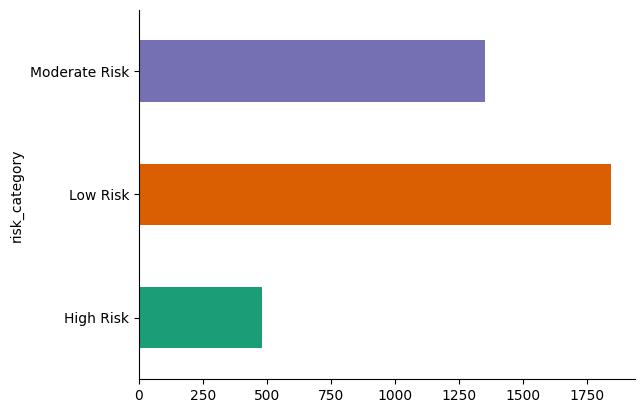

In [17]:
# Visualizaciones en Matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
dfu.groupby('risk_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
dfu['business_id'] = pd.to_numeric(dfu['business_id'])

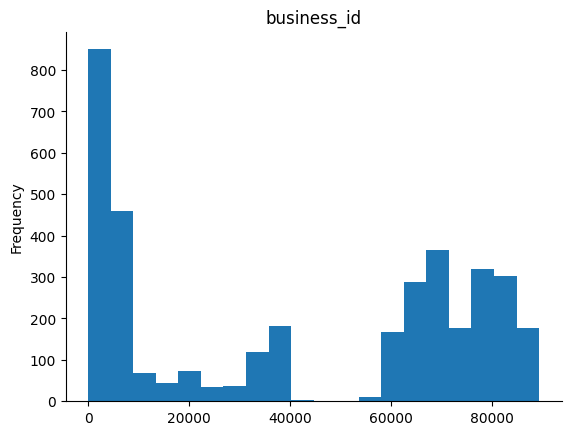

In [19]:
#rom matplotlib import pyplot as plt
dfu['business_id'].plot(kind='hist', bins=20, title='business_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:

# Activar la salida de Bokeh en el notebook
output_notebook()
# dfu = archivo unido
# Agrupar por la columna 'risk_category' y contar
grouped_data = dfu.groupby('risk_category').size().reset_index(name='counts')
grouped_data = grouped_data.sort_values('counts', ascending=True)
# Convertir los datos a un ColumnDataSource
source = ColumnDataSource(grouped_data)
# Crear la lista de categorías ordenadas
categories = grouped_data['risk_category'].tolist()
# Crear la visualización de barras horizontales
p = figure(y_range=categories, height=300, width=400, title="Risk Category Counts",
           x_axis_label='Counts', y_axis_label='Risk Category', toolbar_location=None)
# Agregar las barras al gráfico
p.hbar(y='risk_category', right='counts', height=0.4, source=source, 
       color=factor_cmap('risk_category', palette=palette, factors=categories))
# Eliminar las líneas de la parte superior y derecha
p.outline_line_color = None
p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = None
# Mostrar el gráfico
show(p)

Loading BokehJS ...

In [21]:

# Activar la salida de Bokeh en el notebook
output_notebook()
# dfu = archivo unido
# Agrupar por la columna 'risk_category' y contar
grouped_data = dfu.groupby('inspection_type').size().reset_index(name='counts')
grouped_data = grouped_data.sort_values('counts', ascending=True)
# Convertir los datos a un ColumnDataSource
source = ColumnDataSource(grouped_data)
# Crear la lista de categorías ordenadas
categories = grouped_data['inspection_type'].tolist()
# Crear la visualización de barras horizontales
p1 = figure(y_range=categories, height=300, width=400, title="Inspection types",
           x_axis_label='Counts', y_axis_label='Inspection', toolbar_location=None)
# Agregar las barras al gráfico
p1.hbar(y='inspection_type', right='counts', height=0.4, source=source, 
       color=factor_cmap('inspection_type', palette=palette, factors=categories))
# Eliminar las líneas de la parte superior y derecha
p1.outline_line_color = None
p1.ygrid.grid_line_color = None
p1.xgrid.grid_line_color = None
# Mostrar el gráfico
show(p1)

Loading BokehJS ...

In [22]:

# Activar la salida de Bokeh en el notebook
dfu['ViolationTypeID'] = pd.to_numeric(dfu['ViolationTypeID'])
output_notebook()
# Crear un histograma de ViolationTypeID
hist, edges = np.histogram(dfu['ViolationTypeID'], bins=20)
# Preparar los datos para el gráfico de barras
data = {'left': edges[:-1], 'right': edges[1:], 'counts': hist}
source = ColumnDataSource(data)
# Crear la visualización de barras
p = figure(height=300, width=400, title="ViolationTypeID Histogram",
           x_axis_label='ViolationTypeID', y_axis_label='Counts', toolbar_location=None)
# Agregar las barras al gráfico
p.quad(bottom=0, top='counts', left='left', right='right', source=source, fill_color="navy", line_color="white", alpha=0.5)
# Eliminar las líneas de la parte superior y derecha
p.outline_line_color = None
p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = None
# Mostrar el gráfico
show(p)

Loading BokehJS ...

In [ ]:
pip install pygwalker

In [24]:
#Visualizaciones con Pywalker 
import pygwalker as pyg
pyg.walk(dfu)

Box(children=(HTML(value='<div id="ifr-pyg-0006198ca0a061ddp1BUtGxlj2YfALK9" style="height: auto">\n    <head>…